# Machine Learning Basics
In this module, you'll be analysing a dataset. You will be using the Cinema Data for the tasks in this module. <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis
* Prediction
* Analysing results

## Task 1 - Plotting
* Plot the values of occupancy percentage versus number of weeks since release, for all movies in the dataset. 
* Plot the number of other releases in the week versus occupancy percentage and weeks until the end of lifetime, for all movies.
* Plot the number of shows in the week versus occupancy percentage and weeks until the end of lifetime, for all movies.

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.stats import pearsonr,spearmanr,kendalltau
%matplotlib inline

In [173]:
cinemadata = pd.read_csv('Data/CinemaData.csv')

occ_per = list(cinemadata['OccPer'])
weeks_since_release = list(cinemadata['WeekSinceRelease'])
other_releases = list(cinemadata['OtherReleasesInWeek'])
shows_in_week = list(cinemadata['ShowsInWeek'])

#calculating weeks until lifetime
cinemadata['WeeksUntilLifetime'] = list(cinemadata['Lifetime'] - cinemadata['WeekSinceRelease'])
weeks_until_lifetime = list(cinemadata['WeeksUntilLifetime'])

PLOT1 : No_of_weeks_since_release VS Occupancy_percentage


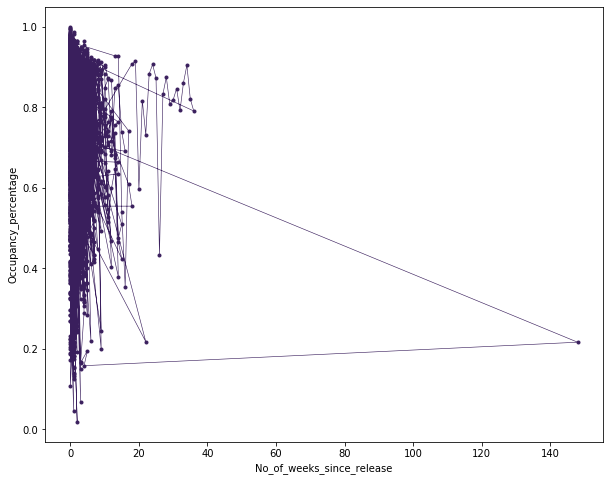

In [218]:

#plot1
plt.figure(figsize = (10, 8))
plt.plot(weeks_since_release, occ_per,  color='#3A1F5D', marker='.', linewidth = 0.6)
plt.xlabel('No_of_weeks_since_release')
plt.ylabel('Occupancy_percentage')
print('\033[1m' + 'PLOT1 : No_of_weeks_since_release VS Occupancy_percentage')
plt.show()
print('\n')


PLOT2 : Other_releases Vs occupancy_percentage and weeks_until_lifetime


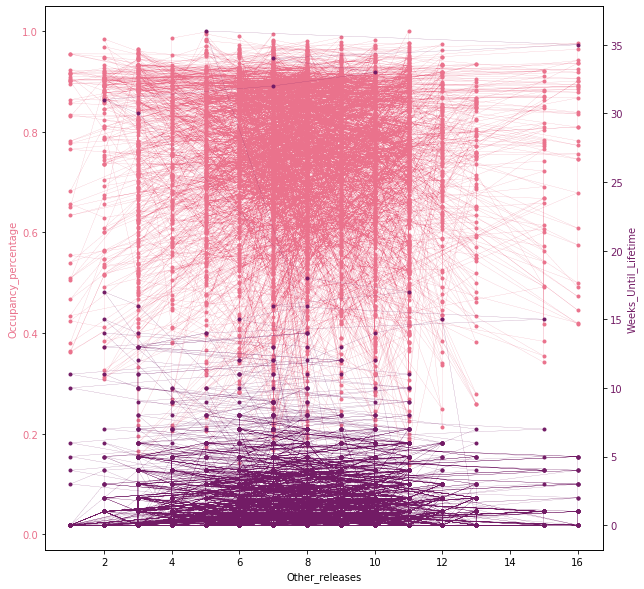

In [184]:
#plot2
fig, y1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
y1.set_xlabel('Other_releases')
y1.set_ylabel('Occupancy_percentage', color = '#EA728C')
y1.tick_params(axis = 'y', labelcolor = '#EA728C')
y1.plot(cinemadata['OtherReleasesInWeek'], cinemadata['OccPer'], color = '#EA728C', marker = '.', linewidth = 0.2, linestyle = 'dashed')
y2 = y1.twinx()
y2.set_ylabel('Weeks_Until_Lifetime', color = '#721B65')
y2.tick_params(axis = 'y', labelcolor = '#721B65')
y2.plot(cinemadata['OtherReleasesInWeek'], cinemadata['WeeksUntilLifetime'], color = '#721B65', marker = '.', linewidth = 0.2, linestyle = 'dashed' )
print('\033[1m' + 'PLOT2 : Other_releases Vs occupancy_percentage and weeks_until_lifetime')
plt.show()
print('\n')


PLOT3 : No of shows in week Vs occupancy percentage and weeks until lifetime


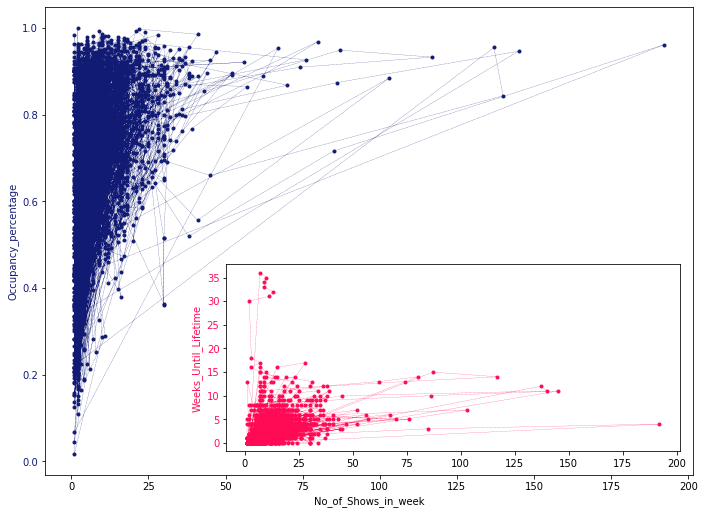

In [182]:
#plot3
fig = plt.figure(figsize = (9, 6.5))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.28, 0.05, 0.70, 0.4])
ax1.tick_params(axis = 'y', labelcolor = '#121b74' )
ax1.set_ylabel('Occupancy_percentage', color = '#121b74')
ax1.set_xlabel('No_of_Shows_in_week')
ax1.plot(cinemadata['ShowsInWeek'], cinemadata['OccPer'], color = '#121b74', marker = '.', linestyle = 'dashed', linewidth = 0.25)
ax2.tick_params(axis = 'y', labelcolor = '#ff0b55')
ax2.set_ylabel('Weeks_Until_Lifetime', color = '#ff0b55')
ax2.plot(cinemadata['ShowsInWeek'], cinemadata['WeeksUntilLifetime'], color = '#ff0b55', marker = '.', linestyle = 'dashed', linewidth = 0.25)
print('\033[1m' + 'PLOT3 : No of shows in week Vs occupancy percentage and weeks until lifetime')
plt.show()
print('\n')


## Task 2 - Reasoning
Now that you have the plots, identify the correlation between the various parameters analysed. Justify the correlations, your observations, and your hypotheses for the same with appropriate reasoning.

In [321]:
#correlation b/w occupancy percentage and No of weeks since release 
corr1, _ = pearsonr(np.array(list(cinemadata['OccPer'])), np.array(list(cinemadata['WeekSinceRelease'])))
print( '\033[1m'+ 'PLOT-1 Observation' + '\033[0m')
print('The correlation coefficient b/w the occupancy rate and the no.of weeks since release is ', round(corr, 2), ' making it clear that both of these variables vary in a non-linear manner.  Also from the above plot we can observe that maximum occupancy percentage is observed during the first weeks since movie release.   This is quite normal as crowds for the movie is spotted just during the beginning of movie release and decreases after few days.')
print('\n')

#correlation b/w other releases and occupancy percentage, weeks until lifetime
corr2, _ = pearsonr(np.array(list(cinemadata['OtherReleasesInWeek'])), np.array(list(cinemadata['OccPer'])))
print( '\033[1m'+ 'PLOT-2 Observation'  + '\033[0m')
print('correlation b/w Other releases and the occupancy percentage:')
print('The correlation coefficient between these two variables is ', round(corr2, 2), ' which clearly indicates a negative correlation.   When other movies are released in the same week, they grab a portion of attention of people and thereby decreasing   the occupancy percentage.From the second plot, it is clear that as more movies are released in the week, a decrease in occupancy percentage is spotted. However with respect to this dataset, certain occupancy percentages remain to stay moderately high despite of other movies.The overall correlation is calculated to be', round(corr2, 2)) 
print('\r')
print('correlation b/w Other releases and Weeks Until lifetime:')
corr3, _ = pearsonr(np.array(list(cinemadata['OtherReleasesInWeek'])), np.array(list(cinemadata['WeeksUntilLifetime'])))
print('As before , a non-linear relationship is identified b/w Other releases and the left over lifetime of a movie with    correlation factor of ', round(corr3, 2),'.Though this factor is not as low as the one seen with occupancy percentage, still a    decrease can be observed. With other movies coming up to compete the currently running movie , just as how the       occupancy percentage drops, the left over lifetime is subsequently reduced. It can be viewed from the plot that with more no.of movies coming up, the left over weeks is concentrated between 0 to 5 weeks. Just a few them have longer   lifetime in this dataset. ' )
print('\r')
print('\033[1m'+'As a whole, negative correlations are identified as both occupancy pecentages and lifetime of the movie decereases   with the advent of new movies that release in the same week seeking the attention of population.' + '\033[0m')
print('\n')
print('\n')

#correlation b/w No.of shows in the week and occupancy percentage, Weeks until lifetime
corr4, _ = pearsonr(np.array(list(cinemadata['ShowsInWeek'])), np.array(list(cinemadata['OccPer'])))
print('\033[1m'+ 'PLOT-3 Observation' + '\033[0m')
print('correlation b/w No.of shows in week and the occupancy percentage:')
print('The correlation factor b/w these two parameters is ', round(corr4, 2), ' which indicates a positive correlation. This is not a perfect linear relationship still indicates that as no.of shows of a movie increase in a week, correspondingly the        occupancy percentage also shifts. It is noted from the plot that though the no.of shows remain low in number, certain occupancy is still spotted high. This could be the movies that were released just by then because of which even with less   no.of shows their occupancy rates are shooted high.Thus, with increased no.of shows though there is no greater difference, still there is slight increase in occupancy but not any drops.')
print('\r')
print('correlation b/w No.of shows in week and lifetime left:')
corr5, _ = pearsonr(np.array(list(cinemadata['ShowsInWeek'])), np.array(list(cinemadata['WeeksUntilLifetime'])))
print('A positive correlation factor of ', round(corr5, 2), ' is observed betwen the no.of shows in week and lifetime left. A moderate linear relationship is observed between these two parameters. With usual no.of shows in the week, the lifetime of the    movie is also kept accordingly moderate. But when very high no.of shows are spotted there is no significant increase in lifetime. The lifetime either remains moderate or reduces.')
print('\r')
print('\033[1m'+ 'As a whole, while viewing plot2, with increased no.of shows in a week the occupancy percentage remains high and the  lifetime remains to be moderate with positive correlations.' + '\033[0m')
print('\n')
    

PLOT-1 Observation
The correlation coefficient b/w the occupancy rate and the no.of weeks since release is  -0.03  making it clear that both of these variables vary in a non-linear manner.  Also from the above plot we can observe that maximum occupancy percentage is observed during the first weeks since movie release.   This is quite normal as crowds for the movie is spotted just during the beginning of movie release and decreases after few days.


PLOT-2 Observation
correlation b/w Other releases and the occupancy percentage:
The correlation coefficient between these two variables is  -0.02  which clearly indicates a negative correlation.   When other movies are released in the same week, they grab a portion of attention of people and thereby decreasing   the occupancy percentage.From the second plot, it is clear that as more movies are released in the week, a decrease in occupancy percentage is spotted. However with respect to this dataset, certain occupancy percentages remain to sta